In [1]:
%pip install cvlib opencv-python matplotlib tensorflow
%tensorflow_version 2.x # магия специфична само за Google Colab

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x # магия специфична само за Google Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
# %git clone ... 

In [2]:
import os
import shutil
import re

import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

Using TensorFlow backend.


In [0]:
def show_objects(image):
    plt.figure(figsize=(9, 9)) # задава размер на показаното изображение
    img = cv2.imread(image) # зарежда изображението
    bbox, label, conf = cv.detect_common_objects(img) # засича обекти
    img_with_bbox = draw_bbox(img, bbox, label, conf) # рисува кутия около обектите
    img_corr_color = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB) # оправя цветовете
    plt.imshow(img_corr_color) # показва изображението
    plt.axis('off') # маха ненужни оси
    plt.show() # особеност на matplotlib

Използваме [YOLOv3](https://pjreddie.com/darknet/yolo/) модела, който е трениран на [COCO](http://cocodataset.org/#home) dataset-а и е способен да рзпознава 80 [common objects](https://github.com/arunponnusamy/object-detection-opencv/blob/master/yolov3.txt) в изображенията.

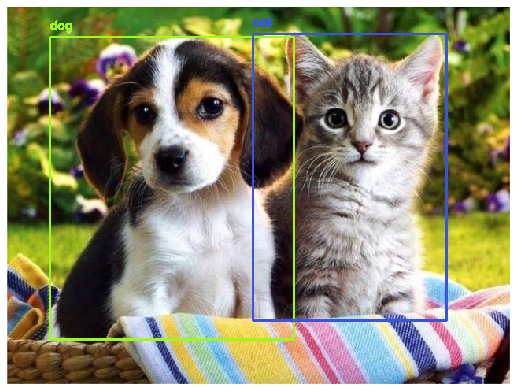

In [4]:
show_objects('Images/8881826188.jpg')

In [0]:
def list_images(path, extension='jpg'):
    images = []
    pattern = re.compile(f'^.+\.{extension}$')
    for filename in os.listdir(path):
        if pattern.match(filename):
            images.append(filename)
    return images

In [0]:
def move_pics(containing, excluding, from_path, to_path, extension='jpg'):   
    if not os.path.exists(to_path):
        os.makedirs(to_path)
        
    for filename in list_images(from_path, extension):
        img_path = f'{from_path}/{filename}'
        img = cv2.imread(img_path)
        _, labels, _ = cv.detect_common_objects(img)
        if containing in labels and excluding not in labels:
            shutil.move(img_path, f'{to_path}/{filename}')


In [0]:
move_pics(containing='cat', excluding='dog', from_path='Images', to_path='Cats')

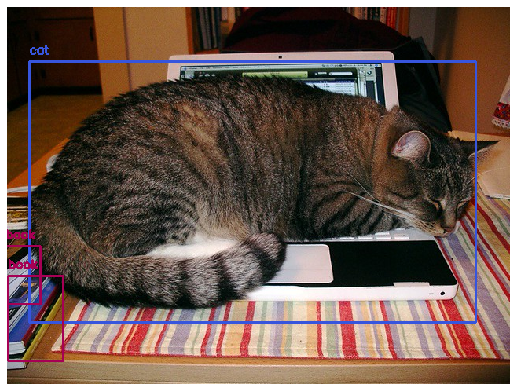

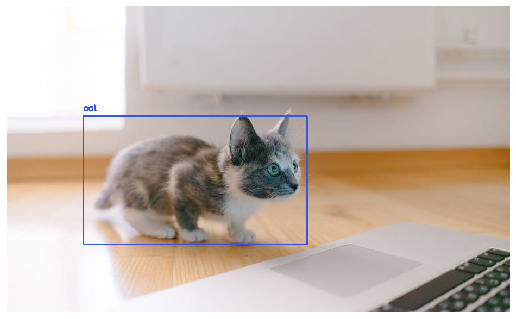

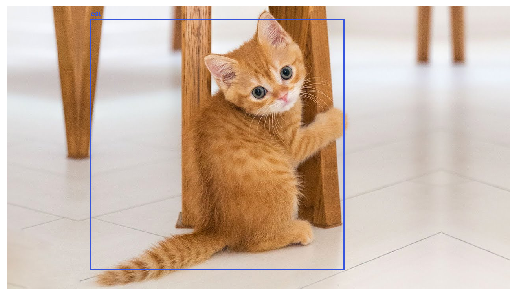

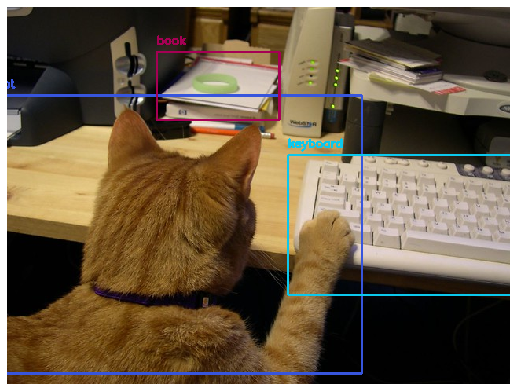

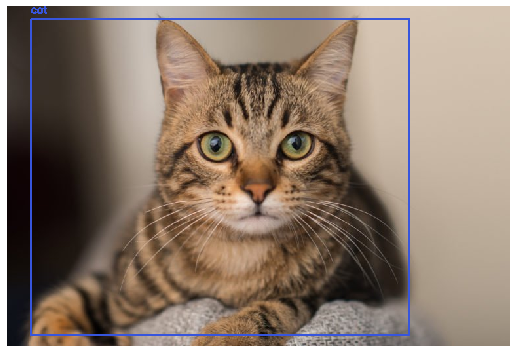

In [20]:
for image in list_images('Cats'):
    show_objects(f'Cats/{image}')